In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir("/Users/fadhlihajar/Desktop/Capstone/ArSL1"))


Using TensorFlow backend.


['test', 'train']


In [2]:
train_dir = '/Users/fadhlihajar/Desktop/Capstone/ArSL1/train'
test_dir = '/Users/fadhlihajar/Desktop/Capstone/ArSL1/test'

unique_labels =  ['bb', 'dha', 'dhad', 'ain', 'ya', 'seen', 'sheen', 'haa', 'fa', 'meem', 'la', 'nun', 'kaaf', 'aleff', 'taa']


IndexError: list index out of range

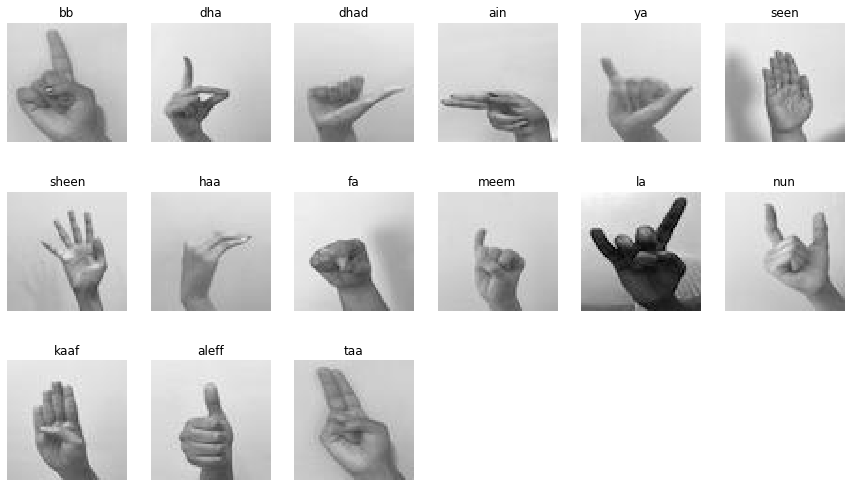

In [4]:
 def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [5]:
labels_dict = {'bb':0,'dha':1,'dhad':2,'ain':3,'ya':4,'seen':5,'sheen':6,'haa':7,'fa':8,'meem':9,'la':10,'nun':11,'kaaf':12,
                   'aleff':13,'taa':14}

def load_data():
    
    # Loads data and preprocess. Returns train and test data along with labels.
    
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [6]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : bb | dha | dhad | ain | ya | seen | sheen | haa | fa | meem | la | nun | kaaf | aleff | taa | 
Loaded 21701 images for training, Train data shape = (21701, 64, 64, 3)
Loaded 1143 images for testing Test data shape = (1143, 64, 64, 3)


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'x_train' is not defined

In [ ]:
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [ ]:
# Actual dataset
for i in range(0,9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(x_train[i], cmap = pyplot.get_cmap('gray'))
pyplot.show()

## Random Shifts

In [ ]:
# reshape to be [samples][width][height][channels]
x_train = x_train.reshape((x_train.shape[0], 64, 64, 3))
x_test = x_test.reshape((x_test.shape[0], 64, 64, 3))
# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

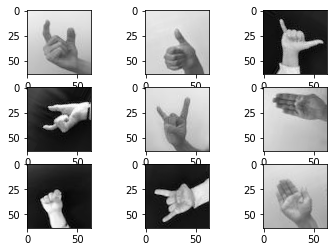

In [15]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 64, 64, 3))
X_test = X_test.reshape((X_test.shape[0], 64, 64, 3))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

# AUG + CNN

In [17]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(15, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 128, epochs = 200, validation_split = 0.1)
    return model_hist 

In [19]:
model = create_model()

MODEL CREATED
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7

In [21]:
curr_model_hist = fit_model()

Train on 19530 samples, validate on 2171 samples
Epoch 1/200
19530/19530 [==============================] - 67s 3ms/step - loss: 0.4374 - accuracy: 0.9557 - val_loss: 0.6859 - val_accuracy: 0.9691
Epoch 2/200
19530/19530 [==============================] - 65s 3ms/step - loss: 0.3014 - accuracy: 0.9750 - val_loss: 0.2972 - val_accuracy: 0.9797
Epoch 3/200
19530/19530 [==============================] - 65s 3ms/step - loss: 0.2160 - accuracy: 0.9824 - val_loss: 0.2143 - val_accuracy: 0.9784
Epoch 4/200
19530/19530 [==============================] - 66s 3ms/step - loss: 0.1597 - accuracy: 0.9862 - val_loss: 0.1626 - val_accuracy: 0.9830
Epoch 5/200
19530/19530 [==============================] - 65s 3ms/step - loss: 0.1288 - accuracy: 0.9890 - val_loss: 0.1261 - val_accuracy: 0.9866
Epoch 6/200
19530/19530 [==============================] - 65s 3ms/step - loss: 0.1045 - accuracy: 0.9908 - val_loss: 0.1149 - val_accuracy: 0.9848
Epoch 7/200
19530/19530 [==============================] - 65s 

Epoch 56/200
19530/19530 [==============================] - 73s 4ms/step - loss: 0.0103 - accuracy: 0.9995 - val_loss: 0.0365 - val_accuracy: 0.9940
Epoch 57/200
19530/19530 [==============================] - 69s 4ms/step - loss: 0.0286 - accuracy: 0.9973 - val_loss: 0.4383 - val_accuracy: 0.9364
Epoch 58/200
19530/19530 [==============================] - 74s 4ms/step - loss: 0.1431 - accuracy: 0.9879 - val_loss: 0.1603 - val_accuracy: 0.9834
Epoch 59/200
19530/19530 [==============================] - 65s 3ms/step - loss: 0.0943 - accuracy: 0.9953 - val_loss: 0.0825 - val_accuracy: 0.9959
Epoch 60/200
19530/19530 [==============================] - 67s 3ms/step - loss: 0.0472 - accuracy: 0.9989 - val_loss: 0.0725 - val_accuracy: 0.9926
Epoch 61/200
19530/19530 [==============================] - 78s 4ms/step - loss: 0.0289 - accuracy: 0.9994 - val_loss: 0.0348 - val_accuracy: 0.9949
Epoch 62/200
19530/19530 [==============================] - 78s 4ms/step - loss: 0.0172 - accuracy: 0.9995

19530/19530 [==============================] - 63s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 113/200
19530/19530 [==============================] - 63s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 114/200
19530/19530 [==============================] - 63s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 115/200
19530/19530 [==============================] - 63s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 116/200
19530/19530 [==============================] - 63s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 117/200
19530/19530 [==============================] - 67s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 118/200
19530/19530 [==============================] - 66s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 

Epoch 169/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 170/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 171/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 172/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 173/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 174/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0594
Epoch 175/200
19530/19530 [==============================] - 62s 3ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy:

In [23]:
if curr_model_hist:
    print('Final Accuracy: {:.2f}%'.format(curr_model_hist.history['accuracy'][4] * 100))
    print('Validation Set Accuracy: {:.2f}%'.format(curr_model_hist.history['accuracy'][4] * 100))

Final Accuracy: 98.90%
Validation Set Accuracy: 98.90%
